# Task 4: Predicting Insurance Claim Amounts

## Objective
Estimate the medical insurance claim amount based on personal data.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Loading Dataset

In [18]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Handling missing or wrong values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [22]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

The dataset shows realistic value ranges with no missing, abnormal or invalid entries.

#### Visualization

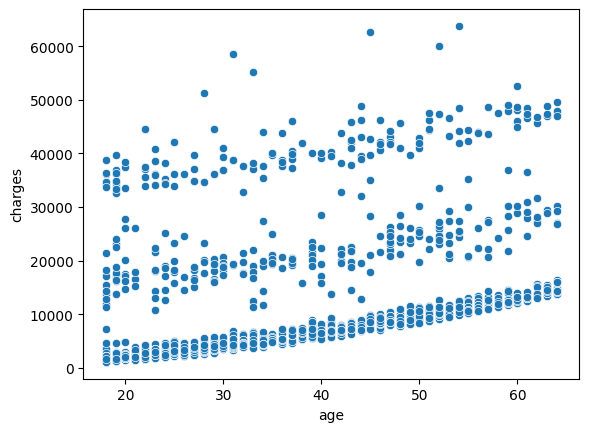

In [23]:
# Age vs insurance charges
sns.scatterplot(x='age', y='charges', data=df)
plt.show()

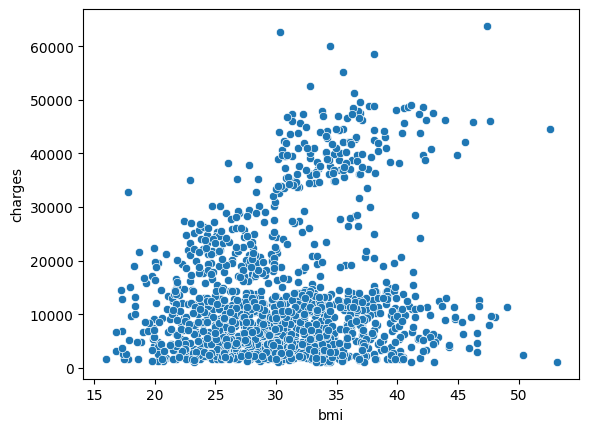

In [24]:
# BMI vs insurance charges
sns.scatterplot(x='bmi', y='charges', data=df)
plt.show()

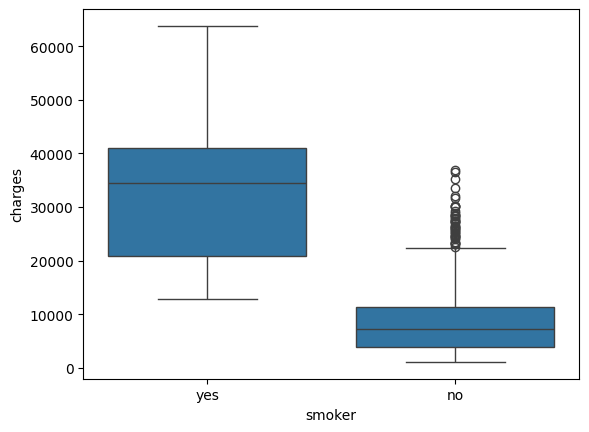

In [25]:
# Smoking status vs insurance charges
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()

Some non-smokers also show high insurance charges, indicating that high medical costs are not limited to smokers.

#### Training the model

In [26]:
# Convert text columns into numbers
df = pd.get_dummies(df, drop_first=True)

Text values were changed into numbers so the model could understand them.

In [27]:
# inputs
x = df.drop('charges', axis=1)
# output
y = df['charges']

In [28]:
# Split into train & test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [31]:
#Train Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Linear Regression is used to predict insurance charges based on customer details.

#### Prediction and Evaluation

In [32]:
# Predict insurance charges for test data
y_pred = model.predict(x_test)

In [34]:
# Check average absolute error
mae = mean_absolute_error(y_test, y_pred)

# Check root mean squared error
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae, rmse

(4181.194473753654, 5796.2846592762735)

The model predicts insurance charges with an average error of around 4,000, which is acceptable given the wide range of medical costs.

## Conclusion

A Linear Regression model was used to predict insurance charges. The model achieved reasonable error values, showing it can estimate medical costs based on customer information.